In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data2'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized_no_test')
MODEL_NAME_BASE = 'inception_ignoring_imbalance_1_whole_model_trainable'

Found 21024 files belonging to 8 classes.
Found 4307 files belonging to 8 classes.
Epoch 1/100
657/657 [==============================] - ETA: 0s - loss: 1.5159 - accuracy: 0.5691

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_1\assets


657/657 [==============================] - 245s 335ms/step - loss: 1.5159 - accuracy: 0.5691 - val_loss: 1.1098 - val_accuracy: 0.6476 - lr: 0.0010
Epoch 2/100
657/657 [==============================] - ETA: 0s - loss: 1.0334 - accuracy: 0.6362

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_2\assets


657/657 [==============================] - 221s 335ms/step - loss: 1.0334 - accuracy: 0.6362 - val_loss: 0.8963 - val_accuracy: 0.6891 - lr: 0.0010
Epoch 3/100
657/657 [==============================] - 159s 241ms/step - loss: 0.9846 - accuracy: 0.6521 - val_loss: 0.9769 - val_accuracy: 0.6445 - lr: 0.0010
Epoch 4/100
657/657 [==============================] - 158s 241ms/step - loss: 0.9948 - accuracy: 0.6452 - val_loss: 41.7173 - val_accuracy: 0.5570 - lr: 0.0010
Epoch 5/100
657/657 [==============================] - ETA: 0s - loss: 0.9552 - accuracy: 0.6557

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_5\assets


657/657 [==============================] - 232s 354ms/step - loss: 0.9552 - accuracy: 0.6557 - val_loss: 0.8653 - val_accuracy: 0.6928 - lr: 0.0010
Epoch 6/100
657/657 [==============================] - 163s 247ms/step - loss: 1.0385 - accuracy: 0.6269 - val_loss: 0.9996 - val_accuracy: 0.6482 - lr: 0.0010
Epoch 7/100
657/657 [==============================] - 160s 244ms/step - loss: 1.0812 - accuracy: 0.6153 - val_loss: 1.6979 - val_accuracy: 0.5428 - lr: 0.0010
Epoch 8/100
657/657 [==============================] - 160s 244ms/step - loss: 1.1225 - accuracy: 0.5996 - val_loss: 0.9745 - val_accuracy: 0.6352 - lr: 0.0010
Epoch 9/100
657/657 [==============================] - 162s 247ms/step - loss: 1.0188 - accuracy: 0.6325 - val_loss: 0.9119 - val_accuracy: 0.6808 - lr: 0.0010
Epoch 10/100
657/657 [==============================] - 164s 249ms/step - loss: 0.9894 - accuracy: 0.6444 - val_loss: 0.9630 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 11/100
657/657 [=============================

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_14\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_14\assets


657/657 [==============================] - 237s 360ms/step - loss: 0.9518 - accuracy: 0.6571 - val_loss: 0.8640 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 15/100
657/657 [==============================] - 168s 255ms/step - loss: 1.0782 - accuracy: 0.6180 - val_loss: 15.2235 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 16/100
657/657 [==============================] - 169s 257ms/step - loss: 1.1220 - accuracy: 0.5949 - val_loss: 6.1431 - val_accuracy: 0.5981 - lr: 0.0010
Epoch 17/100
657/657 [==============================] - 167s 255ms/step - loss: 1.0591 - accuracy: 0.6168 - val_loss: 0.9152 - val_accuracy: 0.6680 - lr: 0.0010
Epoch 18/100
657/657 [==============================] - 168s 255ms/step - loss: 1.0927 - accuracy: 0.6051 - val_loss: 1.0520 - val_accuracy: 0.6304 - lr: 0.0010
Epoch 19/100
657/657 [==============================] - 168s 256ms/step - loss: 1.0856 - accuracy: 0.6127 - val_loss: 1.3416 - val_accuracy: 0.6508 - lr: 0.0010
Epoch 20/100
657/657 [========================

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_23\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_23\assets


657/657 [==============================] - 226s 344ms/step - loss: 0.9524 - accuracy: 0.6540 - val_loss: 0.8623 - val_accuracy: 0.6919 - lr: 0.0010
Epoch 24/100
657/657 [==============================] - 166s 252ms/step - loss: 0.9587 - accuracy: 0.6473 - val_loss: 0.9017 - val_accuracy: 0.6782 - lr: 0.0010
Epoch 25/100
657/657 [==============================] - 164s 249ms/step - loss: 0.9462 - accuracy: 0.6548 - val_loss: 0.8690 - val_accuracy: 0.6903 - lr: 0.0010
Epoch 26/100
657/657 [==============================] - 165s 250ms/step - loss: 0.9625 - accuracy: 0.6492 - val_loss: 1.2360 - val_accuracy: 0.5916 - lr: 0.0010
Epoch 27/100
657/657 [==============================] - 164s 250ms/step - loss: 1.0073 - accuracy: 0.6394 - val_loss: 0.8963 - val_accuracy: 0.6763 - lr: 0.0010
Epoch 28/100
657/657 [==============================] - 164s 250ms/step - loss: 1.0024 - accuracy: 0.6382 - val_loss: 1.0624 - val_accuracy: 0.6840 - lr: 0.0010
Epoch 29/100
657/657 [=========================

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_35\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_35\assets


657/657 [==============================] - 229s 349ms/step - loss: 0.9957 - accuracy: 0.6381 - val_loss: 0.8548 - val_accuracy: 0.6907 - lr: 9.5000e-04
Epoch 36/100
657/657 [==============================] - ETA: 0s - loss: 0.9086 - accuracy: 0.6671

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_36\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_36\assets


657/657 [==============================] - 236s 359ms/step - loss: 0.9086 - accuracy: 0.6671 - val_loss: 0.8371 - val_accuracy: 0.6975 - lr: 9.5000e-04
Epoch 37/100
657/657 [==============================] - 174s 264ms/step - loss: 0.9171 - accuracy: 0.6612 - val_loss: 1.1985 - val_accuracy: 0.5946 - lr: 9.5000e-04
Epoch 38/100
657/657 [==============================] - 171s 261ms/step - loss: 0.9726 - accuracy: 0.6484 - val_loss: 0.8559 - val_accuracy: 0.6921 - lr: 9.5000e-04
Epoch 39/100
657/657 [==============================] - 173s 264ms/step - loss: 0.9860 - accuracy: 0.6458 - val_loss: 0.8655 - val_accuracy: 0.6794 - lr: 9.5000e-04
Epoch 40/100
657/657 [==============================] - 176s 268ms/step - loss: 1.0561 - accuracy: 0.6247 - val_loss: 0.9622 - val_accuracy: 0.6599 - lr: 9.5000e-04
Epoch 41/100
657/657 [==============================] - 172s 262ms/step - loss: 1.0033 - accuracy: 0.6366 - val_loss: 2.0391 - val_accuracy: 0.6722 - lr: 9.5000e-04
Epoch 42/100
657/657 [=

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_48\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_48\assets


657/657 [==============================] - 232s 353ms/step - loss: 0.8748 - accuracy: 0.6774 - val_loss: 0.8232 - val_accuracy: 0.7016 - lr: 9.0250e-04
Epoch 49/100
657/657 [==============================] - ETA: 0s - loss: 0.8540 - accuracy: 0.6851

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_49\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_49\assets


657/657 [==============================] - 237s 360ms/step - loss: 0.8540 - accuracy: 0.6851 - val_loss: 0.8072 - val_accuracy: 0.7037 - lr: 9.0250e-04
Epoch 50/100
657/657 [==============================] - ETA: 0s - loss: 0.8295 - accuracy: 0.6925

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_50\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_50\assets


657/657 [==============================] - 240s 365ms/step - loss: 0.8295 - accuracy: 0.6925 - val_loss: 0.7933 - val_accuracy: 0.7123 - lr: 9.0250e-04
Epoch 51/100
657/657 [==============================] - ETA: 0s - loss: 0.8281 - accuracy: 0.6901

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_51\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_51\assets


657/657 [==============================] - 237s 361ms/step - loss: 0.8281 - accuracy: 0.6901 - val_loss: 0.7898 - val_accuracy: 0.7184 - lr: 9.0250e-04
Epoch 52/100
657/657 [==============================] - 175s 266ms/step - loss: 0.8161 - accuracy: 0.6978 - val_loss: 0.8237 - val_accuracy: 0.7065 - lr: 9.0250e-04
Epoch 53/100
657/657 [==============================] - 175s 266ms/step - loss: 0.8480 - accuracy: 0.6829 - val_loss: 0.8091 - val_accuracy: 0.7084 - lr: 9.0250e-04
Epoch 54/100
657/657 [==============================] - 175s 266ms/step - loss: 0.8881 - accuracy: 0.6733 - val_loss: 0.8138 - val_accuracy: 0.7019 - lr: 9.0250e-04
Epoch 55/100
657/657 [==============================] - ETA: 0s - loss: 0.8193 - accuracy: 0.6953

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_55\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_10_55\assets


657/657 [==============================] - 240s 365ms/step - loss: 0.8193 - accuracy: 0.6953 - val_loss: 0.7744 - val_accuracy: 0.7225 - lr: 9.0250e-04
Epoch 56/100
657/657 [==============================] - 183s 278ms/step - loss: 0.8299 - accuracy: 0.6899 - val_loss: 0.8381 - val_accuracy: 0.7005 - lr: 9.0250e-04
Epoch 57/100
657/657 [==============================] - 183s 279ms/step - loss: 0.8153 - accuracy: 0.6982 - val_loss: 0.8545 - val_accuracy: 0.6896 - lr: 9.0250e-04
Epoch 58/100
657/657 [==============================] - 182s 277ms/step - loss: 0.8165 - accuracy: 0.6949 - val_loss: 0.8516 - val_accuracy: 0.6938 - lr: 9.0250e-04
Epoch 59/100
657/657 [==============================] - 181s 276ms/step - loss: 0.8297 - accuracy: 0.6906 - val_loss: 0.7894 - val_accuracy: 0.7160 - lr: 9.0250e-04
Epoch 60/100
657/657 [==============================] - 179s 272ms/step - loss: 0.8423 - accuracy: 0.6902 - val_loss: 0.9966 - val_accuracy: 0.6578 - lr: 9.0250e-04
Epoch 61/100
657/657 [=

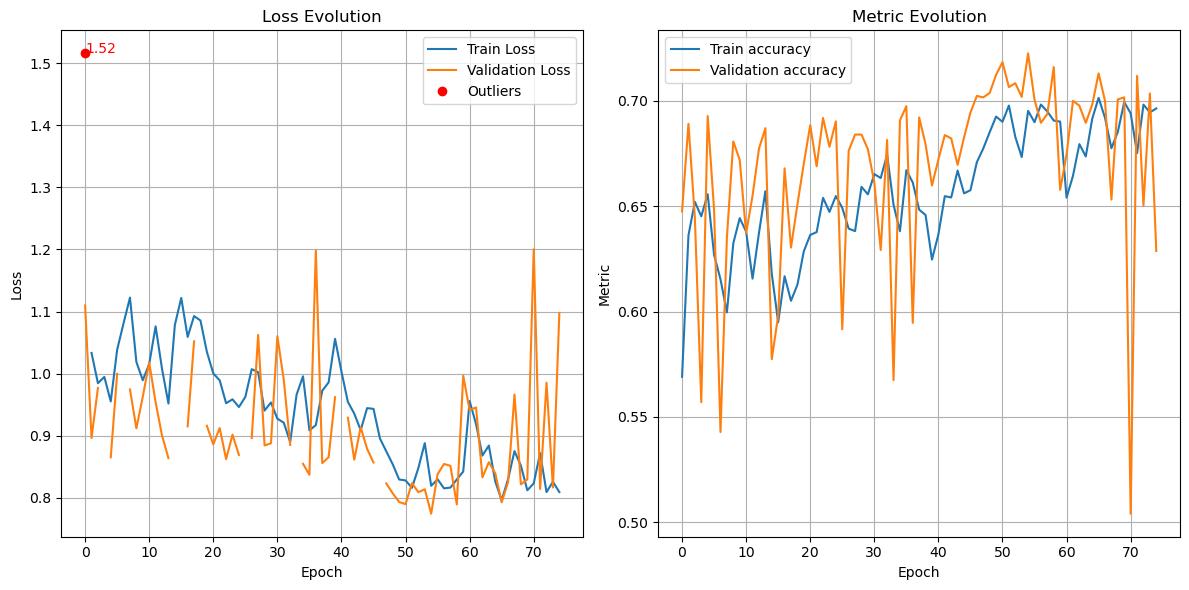

In [3]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes: lambda: get_basic_model(HEIGHT, WIDTH, num_classes),
    get_augmentation_layers)